<h2>Dataframe matplotlib-grafiikaksi - perusasiat</h2>

<ul><li>Jos teen kaavion suoraan dataframesta (df.plot...), niin käytän pandas-kirjaston matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
    <br>Lue lisää <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a></li>
<li>matplotlib.pyplot sisältää komentoja kaavion muotoiluun. Aivan kaikkea näillä komennoilla ei saa tehtyä. 
    <br>Lue lisää <a href="https://matplotlib.org/tutorials/introductory/pyplot.html" target="_blank">https://matplotlib.org/tutorials/introductory/pyplot.html</a> ja <a href="https://matplotlib.org/api/pyplot_summary.html" target="_blank">https://matplotlib.org/api/pyplot_summary.html</a></li>
    <li>Vannoutuneet olio-ohjelmoijat käyttävät mieluummin kaavion luonnin palauttamaa <b>Axes</b>-luokan oliota kaavion muotoiluun.
    <br>Lue lisää <a href="https://matplotlib.org/api/axes_api.html" target="_blank">https://matplotlib.org/api/axes_api.html</a></li></ul>
    
Seuraavassa teen kaaviot suoraan dataframesta ja käytän muotoiluun Axes-oliota.

In [1]:
# Tuon kirjastot
import pandas as pd
import matplotlib.pyplot as plt

# Seuraavan ansiosta kaaviot tulostuvat Jupyter-notebookiin ilman erillistä komentoa
%matplotlib inline

In [2]:
# Luon dataframen
df1 = pd.DataFrame({'Myynti 2017': [1321847, 852669, 1032199, 568230]},
                  index = ['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df1

,Myynti 2017
Helsinki,1321847
Turku,852669
Tampere,1032199
Oulu,568230


<h3>Dataframesta kaavioksi</h3>

- <b>df.plot()</b> luo oletuksena viivakaavion
- Muita kaaviolajeja <b>df.plot.bar(), df.plot.barh(), df.plot.hist(), df.plot.scatter(), df.box()</b>
- Jos aiot muotoilla kaaviota, niin sijoita se muuttujaan. Kaavion luonti palauttaa <b>Axes</b>-luokan olion.

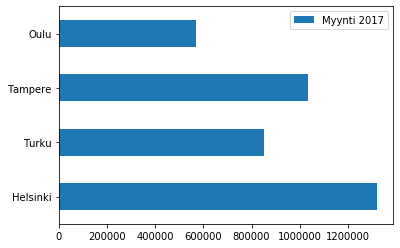

In [3]:
# Myynnit vaakapylväskaaviona
df1.plot.barh()

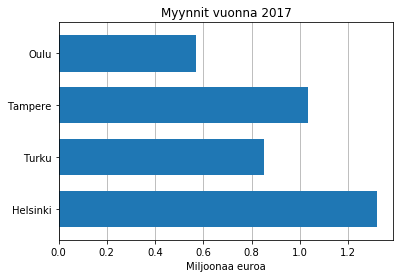

In [4]:
# Pientä tuunausta kaavion luonnin yhteyteen (selite piiloon, pylvään leveyden määritys)
ax1 = df1.plot.barh(legend=False, width=0.7)

# Otsikoita
ax1.set_title('Myynnit vuonna 2017')
ax1.set_xlabel('Miljoonaa euroa')

# Useimpiin määrittelyihin löytyy matplotlib.pyplot-vastine
# Otsikot voisin määritellä myös seuraavasti:
#plt.title('Myynnit vuonna 2017')
#plt.xlabel('Miljoonaa euroa')

# Haen x-akselin ticksit ja muotoilen miljooniksi yhdellä desimaalilla
ax1.set_xticklabels(['{:.1f}'.format(x/1000000) for x in ax1.get_xticks()])

# Taustaviivoitus x-akselin mukaan
ax1.grid(axis='x')

# Taustaviivoitus pylväiden taakse
ax1.set_axisbelow(True)

In [5]:
# Teen uuden dataframen
df2 = pd.DataFrame({'Myynti 2017': [1321847, 852669, 1032199, 568230],
       'Myynti 2016': [1203434, 923450, 1023563, 542399]},
       index = ['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df2

,Myynti 2017,Myynti 2016
Helsinki,1321847,1203434
Turku,852669,923450
Tampere,1032199,1023563
Oulu,568230,542399


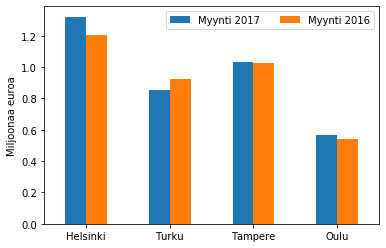

In [6]:
# Luokka-akselin nimiöiden asennon säätö (rot=0)
ax2 = df2.plot.bar(rot=0)

# y-akselin otsikko
ax2.set_ylabel('Miljoonaa euroa')

# Haen y-akselin ticksit ja muotoilen miljooniksi yhdellä desimaalilla
ax2.set_yticklabels(['{:.1f}'.format(y/1000000) for y in ax2.get_yticks()])

# Selitteeseen 2 saraketta (selitteet vierekkäin)
ax2.legend(ncol=2)

[Text(0, 0.5, 'Euroa'),
 Text(0.5, 0, 'Alue'),
 Text(0.5, 1.0, 'Myynti vuosina 2016 ja 2017')]

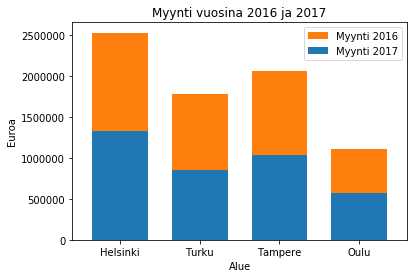

In [7]:
# legend='reverse' kääntää selitteen järjestyksen
# stacked=True pinoaa pylväät päällekkäin
# rot=0 määrittää luokka-akselin nimiöiden asennon
# width=0.7 määrittää pylväiden leveyden (enintään 1)
ax3 = df2.plot.bar(legend='reverse', rot=0, stacked=True, width=0.7)

# Otsikoinnit
ax3.set(title='Myynti vuosina 2016 ja 2017', xlabel='Alue', ylabel='Euroa')

In [8]:
# Teen uuden dataframen
df3 = pd.DataFrame({'Mies':[17,15,6],'Nainen':[8,15,21]},
                  index = ['Tyytymätön','Ei tyytymätön eikä tyytyväinen','Tyytyväinen'])
df3

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


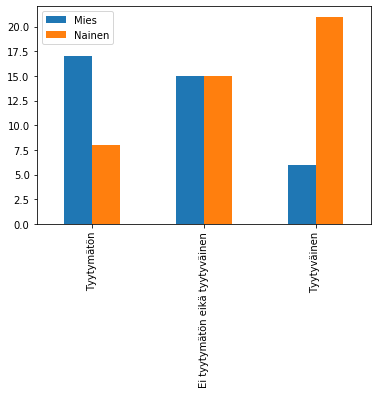

In [9]:
# Kaavio ilman tuunausta
df3.plot.bar()

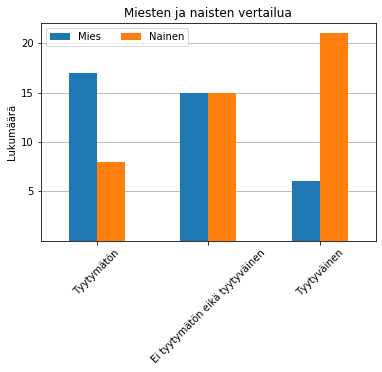

In [10]:
# rot kääntää luokka-akselin nimiöt 45 asteen kulmaan
ax4 = df3.plot.bar(rot=45)

# Otsikoita
ax4.set_title('Miesten ja naisten vertailua')
ax4.set_ylabel('Lukumäärä')

# Asetan y-akselin ticksit itse
ax4.set_yticks([5, 10, 15, 20])

# y-akselin mukainen taustaviivoitus
ax4.grid(axis='y')
ax4.set_axisbelow(True)

# Selite kahteen sarakkeeseen
ax4.legend(ncol=2)

# Tallennan kaavion tai tarkkaan ottaen tallenna kuvion (figure), jonka sisällä kaavio on
# Kuvioon (figure) pääsen käsiksi plt.gcf() -funktiolla (get current figure)
# Ilman lisäparametria bbox_inches='tight' kuvion reunoilta voi jäädä osia tallentumatta
plt.gcf().savefig('testi1.png', bbox_inches='tight')

In [11]:
# Tällä selvitän tarjolla olevat kaavion tallennusmuodot
plt.figure().canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

<Figure size 432x288 with 0 Axes>

<h3>Usean kaavion kuviot</h3>

- Kaavio on aina <b>figure</b> (kuvio) -olion sisällä. 
- <b>Figure</b>-olion sisään voin sijoittaa useita kaavioita <b>plt.subplots()</b>-funktiolla
- <b>plt.subplots()</b> palauttaa <b>figure</b>-olion ja kokoelman <b>Axes</b>-olioista.

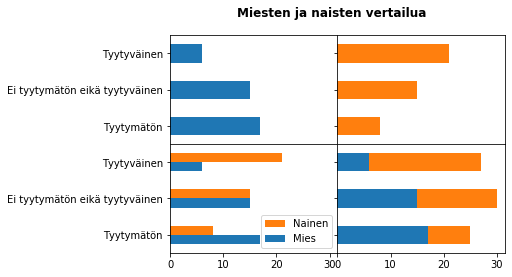

In [12]:
# 2x2 kaaviomatriisi
# sharex- ja sharey-lisäparametreilla asetan yhteiset akselit
fig, ax5 = plt.subplots(2, 2, sharex=True, sharey=True)

# Figuren otsikko
fig.suptitle('Miesten ja naisten vertailua', fontsize=12, fontweight='bold')

# Vasemman yläkulman kaavio
df3['Mies'].plot.barh(ax=ax5[0,0])

# Oikean yläkulman kaavio; värinä väripaletin toinen väri (C1)
df3['Nainen'].plot.barh(color='C1', ax=ax5[0,1])

# Vasemman alakulman kaavio
df3.plot.barh(legend='reverse', ax=ax5[1,0])

# Oikean alakulman kaavio
df3.plot.barh(legend=False, stacked=True, ax=ax5[1,1])

# Kaaviot kiinni toisiinsa
fig.subplots_adjust(wspace=0, hspace=0)

# Tallennan kuvion
# Ilman lisäparametria bbox_inches='tight' kuvion reunoilta voi jäädä osia tallentumatta
fig.savefig('testi2.png', bbox_inches='tight')

<h3>Valmiit tyylit</h3>

Valmista tyyliä käyttämällä saat nopeasti tuunattua grafiikan ulkoasua.

Tyylin voit ottaa käyttöön <b>plt.style.use('tyylin nimi')</b> -komennolla.

In [13]:
# Tarjolla olevien tyylien listaus
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

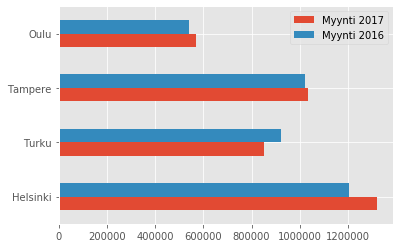

In [14]:
# Esimerkkinä ggplot-tyyli
plt.style.use('ggplot')

df2.plot.barh()